# Session 3: SVD and PCA

Welcome to Session 3 of the practical Machine Learning sessions. In this practical session, we'll understand and implement SVD and PCA, which stand for **Singlular Value Decomposition** and **Principal Component Analysis**. These two ideas are very similar, and have the same end goal. 

In this session, we'll only introduce ourselves to these concepts. The reason we won't go deep into these topics in this session itself, is because these topics have no practical application independently. They are used as a part of bigger models. So in this session we'll understand the concepts and intuition behind SVD and PCA, and later use it as a part of other Machine Learning projects. But yet, these topics deserve an entire session dedicated to themselves, because even though we cannot build a model using these topics, the idea behind them is quite important in Machine Learning, and its not totally self-intuitive. So the ideas do need a little bit of explanation. Also, we will still build interesting models using these concepts.

As you know, these sessions are more practically-oriented than theoretically-oriented. So, we will not dive into most of the mathematics and theory behind the concepts, and only touch the information that is needed to build the code for our model. Our focus will be on understanding the functionality. You can find the exact innards of these concepts through a lot of online resources, and even the theory lectures of this course. However, this is a concept that does require a little bit of mathematics to intuitively understand the concept, and so if you don't get it at once, don't be discouraged! Go through it slowly and you will surely understand the concepts. 

So, Let us first understand what is the motivation behind these concepts, and then understand what SVD and PCA are. 

## The Curse of Dimensionality

Data, especially in recent times, often are of very high *dimensions*, or features. For example, satellite images sometimes contains thousands of bands of frequency spectrums, called *channels*, each of which is a separate feature. In Natural Language Processing (that is, the branch of AI that deals with Language understanding, for example, voice recognition (Siri, Google Assistant, Alexa), language to language translation, Sentiment Analysis (identifying hate speech, violence, etc)), words are represented as individual features. So if you wanted to model the entire English Language, you would be dealing with 1 million+ features. 

Infact, think of the amount of data that your phone generates. Modern phones have a lot of sensors, like Accelerometer, Gyroscope, Magnetometer, light sensor, biometric sensor (fingerprint scanner), GPS sensor, etc., all of which generate data continuously and independently, which is eventually transmitted to the company, which it uses to provide various services. Similarly, Aeroplanes generate hundreds of biliions of gigabytes of data every year, in the form of multiple sensors and manually fed data. The list goes on and on. 

Now, ideally, the goal of any model is to understand the data completely, or in other words, extract *all* the information that the data can provide to us, and the utopian solution to this is to build a model over all the data available, including all features.

But, practically, its not an efficient method to use all the features of the data. 

1. It increases the time and space complexity of the problem. Hence, more resources are required. And this becomes a problem when we deal with huge amounts of data, (billions of data points, for example). (By the way, we call this *Big Data* in modern lingo). And even the most sophisticated computing system either are not capable of, or are pushed to the limits trying to handle such data. 
2. Most of the times, we do not even need all the features of the data. Many features are either useless, redundant, or provide very little information about the objective - so little, that even if we ignore the feature completely, there would not be a significant difference in the results. 
    
 For example, the health tracking app on your phone determines how many steps you walked in a day. The data from the biometric sensor is of no use for this application. However, an application that tracks your daily screen time would need data from the biometric scanner, the light sensor, etc, but on the other hand, would not require data from the gyroscope. Maybe the gyroscope is somewhat related to your usage of the phone, and may give some additional information about your screen time, but the light sensor and biometric sensor may give us enough information to accurately determine your screen time, and hence, we may not need the gyroscope information at all!
 
So, if you pick any domain, you will, more or less, have access to a lot of types of data. But not all of the data is useful or feasible to use, and so, as Data Science practitioners, one of the most important tasks in any project is to understand what data is useful for your purpose, and which is not. This problem of having way too much information, is called the *Curse  of Dimensionality*.

This leads us to the idea of ranking features by their importance. We would like to retain more important features and discard the less important features. Cognitively speaking, we can identify which features are important to our particular problem. For example, if we were to build the fitness tracking app of your phone, which can track how many steps you take, you would know that the data from the light sensor is more or less useless to build this feature. This is possible because we have an *understanding* that features which are related to the number of steps taken are more relative to this application, and others are not. 

But Machines do not understand these concepts, atleast not in today's world. They treat all features with equal importance. So how do we build a system that can rank features based on their importance?

## Variance in Data: An intuition

The idea is to rank features based on the *amount of information* each feature carries. In mathematics, the idea of the amount of information is represented by the *variance* of the value of a feature for all data points, or in other words, how spread out the values of a feature are.

> If you're not familiar with the concept of variance, [here](https://www.youtube.com/watch?v=MRqtXL2WX2M) is a great source to give you an intuition. This video is based on the idea of *standard deviation*, which is very much similar to variance. In mathematics, variance is defined as the square of the standard deviation. So the idea is similar. A larger standard deviation also means a larger variance. However, note, that we are not concerned with the mathematical formula of variance. Here, by reference, we only are refering to the idea of "spread".

>Note: Variance is a concept that is applied to a *distribution* of data, or in other words, a collection of data. The data that we deal with is also a distribution (collection of items). Hence for each feature, a separate distribution can be generated. The values of a particular feature of all data points will constitute the distribution. So each feature will also have its own variance.

**The more the Variance, more is the information constituted in the feature.** The features with less variance do not provide us with a lot of information, and are thus, less relevant to us.

To understand this concept more intuitively, have a look at this meme below. 

<figure><center>
<img src='https://drive.google.com/uc?id=142b3dOpsaLbYlTIHdh4gSOxu0MFqa3B6' width='40%'>
</center></figure>

This is obviously meant as a joke, but it serves us as a great example. If you really wanted to differentiate between two species of animals, horses and crocodiles for example, you would collect data about these animals. The features could be - number of eyes, number of ears, weight, etc. As ridiculous as it may seem, even "whether it is culpable for the death of Princess Diana" is a feature. 

These features essentially have no *variance* among them. All horses have 2 eyes, and so do all crocodiles (atleast physically). No model in this world can differentiate between horses and crocodiles on the basis on number of eyes. This occurs due to the *lack of variance* in this feature. If you were to plot the number or eyes of 100 horses and 100 crocodiles, the distribution would not be spread out at all!

Now consider the length of the ears of these two animals. The ears of a horse are of about 5 cm. Crocodiles on the other hand, do not have an external ear. So now you can easily differentiate between a horse and a crocodile now. This is because there exists variation in the data. And because of this, you can create two very distinct groups of animals.

So now you see, among all the features, only one feature is sufficient to differentiate in this case. This is why extracting the more important features is important.

The job of SVD and PCA algorithms is to find which features have the most variance, and hence carry the most information. Not only is it useful to identify the more important features, but also help us visualize data better. As you know, we can't imagine anything beyond 3 dimensions. So using SVD/PCA, we can represent almost all the information in just 3 dimensions, that would otherwise require, say, 100 dimensions. 



Lets learn about some details. We'll talk about SVD first, and then PCA. These 2 are anyways very similar concepts.

## How SVD ranks features

SVD refactorizes the input tensor (matrix) into a product of three matrices. Let us consider a matrix *A* of shape $m \times n$. SVD breaks it down into three matrices $U,S$ and $V$, such that

$A_{m \times n} = U_{m \times q} S_{q \times q} V^T_{q\times n}$


where S is a eye Matrix (a matrix whose only diagonal values are non zero, and remaining are zeros), and $V^T$ refers to the inverse of matrix $V$. $q$ takes the value of $min(m,n)$. 

<figure><center>
<img src='https://drive.google.com/uc?id=17fe47Y6cZuAedqNjvuYdz0igZGuJbrlr' width='70%'>
</center></figure>

Let us test this out. PyTorch provides us methods to calculate SVD and PCA. We'll use it for now, and later introduce you to other libraries that can carry out these operations. However, we prefer PyTorch because, as we mentioned, we'll be using SVD and PCA as part of a bigger project, like a Linear Regression Model, or a Logistic Regression Model, or a Neural Network, and in that case, PyTorch will help us avoid gradient calculations, and also provide us with *tensors*, that can handle data very well.

We also import matplotlib at this point, which will help us visualize our tensors.

In [ ]:
import torch
import matplotlib.pyplot as plt

Let us generate a random tensor, of a random shape, lets say 10 x 6 (mxn)

In [ ]:
A= torch.rand((10,6))

Let us perform SVD on it. If you google "pytorch svd", the first or second link will lead you to the documentation of SVD in PyTorch. [Here](https://pytorch.org/docs/stable/generated/torch.svd.html) is the documentation. In the example section, the syntax is mentioned. Let us follow the exact syntax.

In [ ]:
u,s,v = torch.svd(A)

In PyTorch, all data containers are expected to be tensors. U, S and V too must be tensors. Let us verify that.

In [ ]:
type(u), type(s), type(v)

Let us also determine the shapes of these tensors.

In [ ]:
u.shape ,s.shape, v.shape

$q$ is $min(m,n) = min(10,6) = 6$. 

So u is of shape $m \times q = 10\times6$ 

$s$ is supposed to a diagonal matrix. Instead, PyTorch directly provides us with the values of the diagonal elements. You can simply convert it to the diagonal matrix by `torch.diag(s)`.

And finally $V^T$ is of shape $q\times n =6\times 6$ meaning, $V$ is of shape $6 \times 6$ too.

Let us verify if the relationship written above holds.

In [ ]:
u@torch.diag(s)@v.T #this is a tensor

In [ ]:
A

You can compare by a quick visual look. The two tensors are exactly identical.
Using a randomly generated tensor may not be as intuitive. Let us try this with a real world example. Let us upload an image to this notebook. Let us work with a specific image. 

<figure><center>
<img src='https://drive.google.com/uc?id=1cEmeBLncAbrbDparKHZ7hU_AXaRvJ_ql' width='50%'>
</center></figure>

This is a 1920x1080 pixel image. Pretty large! Let's download this image to our notebook. To save you time, we're using a publically shared google drive image, which can be downloaded into the local environment in Google Colab by using the `!gdown` statement!

We also use the PIL library, which is a standard Python Image processing Library (ie, to read a jpg/png file). Also, in order to convert jpg images to PyTorch tensors, we'll need the PyTorch child library torchvision.

In [ ]:
from PIL import Image
import torchvision

#let us also define functions that convert image to tensor and viceversa
image2tensor = torchvision.transforms.ToTensor()
tensor2image = torchvision.transforms.ToPILImage()

In [ ]:
!gdown --id 1cEmeBLncAbrbDparKHZ7hU_AXaRvJ_ql >/.tmp
!ls

In [ ]:
img=Image.open('03 landscape.jpg')
img

In [ ]:
tensor_landscape = image2tensor(img).float()
tensor_landscape.shape

Notice that this image has 3 channels (Red Green and Blue), each of which is a tensor of shape (1080 x 1920). In total, there are 3x1080x1920 pixels = 6,220,800 pixels (6.2 million pixels). Thats a lot of pixels. We often undervalue modern technology. Just a few decades ago, it would not have been possible to fit this image in a single computer, that occupied an entire room ([source](https://www.snopes.com/fact-check/computer-storage-1956/)).

> Note: In Many other libraries, image tensors are usually of the shape (m,n,3) rather than (3,m,n). This is one speciality about PyTorch. This is because PyTorch does all operations from the right. For example, PCA/SVD is done on a 2D matrix. So PyTorch would only operate SVD/PCA on the right most 2 dimensions, and leave the rest dimensions untouched. As you will see, this is not only efficient (doesn't require extra lines of code to exclude certain dimensions), but also is desirable for visualization as well as ease of operation of large amounts of data.

## So Now let us apply SVD to this image.
same method as above!

In [ ]:
u,s,v = torch.svd(tensor_landscape)
u.shape, s.shape, v.shape

Notice the extra dimension of 3 in these tensors. This is because of the 3 channels in the image. PyTorch has applied SVD on all 3 2-D matrices independently, and kept all dimensions separate.

Let us verify that we can reobtain the image from these vectors. We have defined a function that can take these decomposed tensors (u,s,v) and return a tensor which represents the original tensors. You can ignore all the new PyTorch functions used in this function. We do this because the `@` operator does not know how to handle batches. So we have to use inbuilt pytorch functions. 

In [ ]:
def decomposed2tensor(u,s,v): return torch.matmul(torch.matmul(u,torch.diag_embed(s)),torch.transpose(v,-1,-2))

In [ ]:
tensor = decomposed2tensor(u,s,v)
tensor2image(tensor).resize((800,400))

We have recovered the same image!

## So now lets choose a subset of features.
As you would remember from the MNIST example from the Logistic Regression session, each pixel in this image is a separate feature. Here too, each pixel is a separate feature. But there are way too many features here - 6,220,800 features.

How do we choose the most important features?

The $S$ tensor is the key to our answer. $S$ gives the variance of each new feature in descending order. Hence, it also represents features in the descending order of the amount of information the features carry. 

Let us see this for ourselves! 



In [ ]:
plt.plot(s[0])
plt.xlabel('feature number')
plt.ylabel('amount of information')

As you can see, $S$ is a constantly decreasing tensor. The first value corresponds to the feature with the highest variance. You can also notice - the first 50 or so features carry most of the information. Then why would we need the remaning 1030 features? 

> Note: This method of determination of number of useful features is called the elbow selection method. Wherever there is a steep bend in the amount of information is a good selection of number of crucial features. However, this is not a hard and fast rule, and trial and error is the only absolute method. It depends on how much information you're willing to throw away.

By the way, internally, $USV^T$ is not exactly same as $A$, even though the final values are the same. Actually, U, S and V jumble up all the features of A in such a manner, that the feature with the most variance (can be a linear combination on many original features) emerges at the first position, and the one with the least variance comes at the end. 

Let us now choose the first 50 most important features from this photo.


Remember, A is decomposed as 

$A_{m \times n} = U_{m \times q} S_{q \times q} V^T_{q\times n}$


Out of q features, if you were to choose 50 features you would choose the first 50 elements of $S$. Correspondingly you would choose the first 50 elements of the columns of $U$ and first 50 rows of $V^T$, in order to make the matrix operations compatible. Here is a great visualization of the concepts.

<figure><center>
<img src='https://drive.google.com/uc?id=1cYCEqI-9Bbl8-wC6cTkdc0HSCKC4MN2t' width='40%'>
</center></figure>

Or mathematically,

$A_{m \times n} = U_{m \times 50} S_{50 \times 50} V^T_{50\times n}$

The most beautiful thing about this equation is that, the output of the product of these vector is still the original size (ie, 1080x1920 pixels)


In [ ]:
u1,s1,v1 = u[:,:,:50] , s[:,:50] , v[:,:,:50]
u1.shape, s1.shape, v1.shape 

Let us Reconstruct the original image from these vectors.

In [ ]:
tensor = decomposed2tensor(u1,s1,v1)
img=tensor2image(tensor)
img.resize((800,400))

The image quality has slightly gone down, But, the image is still understandable. All the while, having reduced its size by a lot. 

The original Image was 3x1920x1080 pixel values = 6,220,800 pixels
This image, made from decomposed matrices, have a size of only 450150 values (3x1080x50 + 3x50 + 3x1920x50), which is over 13 times smaller than the size of the file. If the original file was 5MB, this file would be less than 400 KiloBytes. 

This is how WhatsApp transfers images. It does not transfer the image in its original quality, but *compresses* the image, using a similar algorithm. The quality is not compromised much, but the size reduces dramatically. 

How much variance (information) has been used to generate this image?

In [ ]:
print((torch.sum(s[:,:50])/torch.sum(s)), '% of the information has been used')

Meaning, almost the first 50 features contain 50% more information than all remaining 1030 features combined.

Obviously, SVD throws away certain information. So we can't expect the quality of the image to be the same as the original, and at the same time, the memory efficiency of the data to reduce. You always need to do a tradeoff. But SVD is a great tool when memory is an issue, and at the same time, *some* tradeoff in the quality of data is acceptable. For example, we can still accept a Machine Learning model to identify that this is a picture of a lake and mountains, even though we've reduced the size by over 13 times. 

___

For the sake of simplicity, let us redefine a function, so that we dont have to manually slice tensors according to the number of features to be selected. To this you can pass the decomposed tensors, as well as (optionally) how many features to choose. If nothing is passed to `k`,all the features are chosen.

You can also pass in any types of data, not necessarily a single image, but a batch of mutiple images (both multichanneled and single channeled (such as Black and White images). 

In [ ]:
def decomposed2tensor(u,s,v,k=None):
    if k is None: k=s.shape[-1] + 1 
    u1,s1,v1 = u[...,:k] , s[...,:k] , v[...,:k]
    return torch.matmul(torch.matmul(u1,torch.diag_embed(s1)),torch.transpose(v1,-1,-2))


#does it work?
decomposed2tensor(u,s,v,k=10).shape , decomposed2tensor(u,s,v).shape 

### PCA

PCA is an optimized version of SVD. 
* It normalizes the data before decomposing it
* It only calculates certain number of features, and not all possible features, thus speeding up the process of calculations. In PyTorch, this value is $min(6,m,n)$, though it can be adjusted by us.

[Here](https://pytorch.org/docs/stable/generated/torch.pca_lowrank.html) is the documentation of the function.

If you remove the normalization, and set the number of features to be calculated the same as SVD, then this algorithm will basically work like SVD. Hence, you see, PCA and SVD are not very different algorithms.

For this example, we will not normalize the data, because normalization usually does not work well with images. Just to demonstrate, we first show you the result of PCA *with* normalization. 

However, for other types of data, normalization gives better, more stable results.

In [ ]:
u,s,v = torch.pca_lowrank(tensor_landscape) # with normalization
u.shape, s.shape, v.shape

In [ ]:
tensor=decomposed2tensor(u,s,v)
tensor2image(tensor).resize((500,500))

Clearly, normalization creates a lot of noise in Images. To avoid normalization, set the `center` parameter as `False`. We will also choose 50 features, just as before, using the `q` parameter. (Read documentation to understand syntax)

In [ ]:
u,s,v = torch.pca_lowrank(tensor_landscape,center=False,q=50)
tensor=decomposed2tensor(u,s,v)
tensor2image(tensor).resize((800,400))

This is absolutely the same as the result we received from SVD.

## Can we Apply SVD/PCA through other libraries too? (Optional)
Yes we can! Why just stick to PyTorch? In Many cases, other libraries may be more appropriate to use!

1. ### **Using NumPy**

 NumPy provides us with a method to calculate the decomposed matrices (U,S,V). 

In [ ]:
import numpy as np

Let us begin by creating a random matrix, just like we did in the beginning of this notebook.

In [ ]:
array = np.random.randn(10, 6)

Now let us calucalte the decomposed matrices. Note: that np.linalg.svd directly returns $V^T$, and not $V$.

In [ ]:
u,s,vT = np.linalg.svd(array,full_matrices=False) 
u.shape, s.shape, vT.shape

Can we reconstruct `array` from these matrices?

In [ ]:
pred = u @ np.diag(s) @ vT
pred

In [ ]:
array

You can compare that these two matrices are the same. Again you can simply slice the decomposed matrices to obtain the more important features.

### 2. **PCA Using sklearn** 


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

sklearn too expects numpy arrays as input.

In [ ]:
pca.fit(array);

And then you can access the values of each of these matrices separately.

In [ ]:
pca.singular_values_ # S values

## Review 
There you have it! You have implemented the PCA and the SVD algorithm. Congratulations!
Below we've given some review questions for you to try out. But before that, there are a few tips and review points, that you should go through, think over, and make sure you understand each of them. These points are the most important points of this entire session - and not surprisingly, these are the concepts and ideas that will actually help you be a good Machine Learning practitioner.

* Its natural you would be feeling slightly overwhelmed by all the mathematics and concepts we learned above. But in reality, there are entire books written just on the mathematics of these algorithms. We've barely scratched the surface, and to be honest, thats all that we need to know to get what we need. 

 Don't try to memorize the formulae, the concepts are enough to know! Regarding the code, you can always come back, and refer to the structure of the code, and even copy paste it to your own application. Programming is all about how to get the most out of the resources available. You should know the art of how to write, rather than what to write!

* As Data Science Practitioners, we cannot completely avoid the math and the stats. However, in practical Machine Learning, a lot can be avoided (unless you're pursuing research, in which case, math is essential!). That being said, don't be afraid of the math. Patience is key!

## Review Questions:
These are non-evaluative, but highly recommended to go through. Make sure you clearly know the answer to each of these concepts. The answers to all these questions are somewhere in this notebook, so if you find yourself unclear with a concept, go back up and find the answer!

1. Mathematically, how is the concept of *information* represented in data?
2. What does the tensor $S$ represent in SVD (or PCA)?
3. Why do we need to rank the importance of data. Can you give an example from outide the examples above?
4. When is dimensionality reduction suitable?
5. How do we determine how many features are the optimal number of features to use?





# Exercise (Evaluative):


In Lab02: Logistic Regression, we built a MNIST Digit classifier. We acheived an accuracy of about 88% between 3's and 5's. Let us now further apply SVD to the dataset and see how it affects the performance of the mdel.
To simulate this, we will apply reduce the size of all images in our dataset by selecting a few important *features* from the images.

We provide you with a structure of the code we used before. You need to modify this code to apply PCA to the dataset.


In [1]:
#necessary imports
from torch.utils.data import DataLoader
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
#necessary definitions

def convert_PIL_to_tensors(images):
    images=list(images) #to make sure we can index the collection of images properly. Because of this, the input to this function need
                        #not necessarily be a list, but can a set, tuple, generator or even a dictionary
    return torch.stack(list(map(torchvision.transforms.ToTensor(),images))).float()

def init_params(size, requires_grad=True): return (torch.randn(size)).requires_grad_()

def logistic_regression_model(x): 
    return torch.sigmoid(x@weights + bias)

def binary_classification_loss(preds,targets):
    assert len(preds)==len(targets)
    return torch.where(targets==1,1-preds,preds).mean()

def calc_grad(x_batch,y_batch,model): 
    preds=model(x_batch)
    loss=binary_classification_loss(preds,y_batch)
    loss.backward()

def train_epoch(model,lr,params):
    for x_batch,y_batch in dl: 
        calc_grad(x_batch,y_batch,model)
        for p in params:
            p.data -= lr*p.grad 
            p.grad.zero_()

def batch_accuracy(preds,y_batch):
    return ((preds>=0.5)==y_batch).float().mean()

def validate_epoch(model):
    accs=[batch_accuracy(model(x_batch),y_batch) for x_batch,y_batch in valid_dl]
    return torch.stack(accs).mean().item()


In [3]:
def decomposed2tensor(u,s,v,k=None):
    if k is None: k=s.shape[-1] + 1 
    u1,s1,v1 = u[...,:k] , s[...,:k] , v[...,:k]
    return torch.matmul(torch.matmul(u1,torch.diag_embed(s1)),torch.transpose(v1,-1,-2))

In [4]:
mnist_train_ds = torchvision.datasets.MNIST(root='',download=True)
mnist_test_ds  = torchvision.datasets.MNIST(root='',train = False, download=True)
len(mnist_train_ds), len(mnist_test_ds)

(60000, 10000)

In [5]:
threes_ds = [i for i in mnist_train_ds if i[1]==3]
fives_ds  = [i for i in mnist_train_ds if i[1]==5]

In [6]:
threes_test_ds = [i for i in mnist_test_ds if i[1]==3]
fives_test_ds  = [i for i in mnist_test_ds if i[1]==5]

In [7]:
x_threes=convert_PIL_to_tensors([i[0] for i in threes_ds]).view(-1,28*28)
x_fives =convert_PIL_to_tensors([i[0] for i in fives_ds]).view(-1,28*28)

x_dataset = torch.cat((x_threes,x_fives))
y_dataset = torch.stack([torch.tensor(1.)]*len(x_threes) + [torch.tensor(0.)]*len(x_fives))

In [8]:
x_threes_test=convert_PIL_to_tensors([i[0] for i in threes_test_ds]).view(-1,28*28)
x_fives_test =convert_PIL_to_tensors([i[0] for i in fives_test_ds]).view(-1,28*28)

x_test_dataset = torch.cat((x_threes_test,x_fives_test))
y_test_dataset = torch.stack([torch.tensor(1.)]*len(x_threes_test) + [torch.tensor(0.)]*len(x_fives_test))

In [9]:
u1,s1,v1 = torch.pca_lowrank(x_dataset) 
x_pca_dataset=decomposed2tensor(u1,s1,v1)

u2,s2,v2 = torch.pca_lowrank(x_test_dataset) 
x_test_pca_dataset=decomposed2tensor(u2,s2,v2)

At this point, when we trained our model.

In [10]:
weights=init_params((28*28,1))
bias=init_params(1)
params=weights,bias

train_dset=list(zip(x_pca_dataset,y_dataset))
valid_dset=list(zip(x_test_pca_dataset,y_test_dataset))
dl=DataLoader(train_dset,batch_size=16)
valid_dl=DataLoader(valid_dset,batch_size=32)

for _ in range(100):
    train_epoch(logistic_regression_model,0.25,params)
    print(validate_epoch(logistic_regression_model),end=' ')

0.8310361504554749 0.8433873057365417 0.8522414565086365 0.8626581430435181 0.8663039803504944 0.8735955953598022 0.8746373057365417 0.8772414326667786 0.8746373057365417 0.8746373057365417 0.8772414326667786 0.8767206072807312 0.8756789565086365 0.8756789565086365 0.8756789565086365 0.8761997818946838 0.8782831430435181 0.8788039684295654 0.8788039684295654 0.8793247938156128 0.8793247938156128 0.8797805309295654 0.8797805309295654 0.8803013563156128 0.8818638324737549 0.8813430070877075 0.8808221817016602 0.8818638324737549 0.8823846578598022 0.8823846578598022 0.8823846578598022 0.8823846578598022 0.8823846578598022 0.8823846578598022 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8829055428504944 0.8818638324737549 0.8818638324737549 0.8818638324737549 0.8818638324737549 0.8818638324737549 0.880673348903656 0.880673348903656 0.880673348903656 0.8806733489036

Now, apply svd to the train and test datasets. We apply SVD only to the x datasets , ie, only the `x_dataset` and the `x_test_dataset`. Determine the appropriate number of features through the training dataset. Train this dataset.

Vary the number of features and record the change in final testing accuracy. Plot a number-of-features(k) vs accuracy plot for a few k values.

You may use some of the functions defined earlier in this notebook.

In [11]:
x_dataset1=x_dataset
x_test_dataset1=x_test_dataset

Training dataset


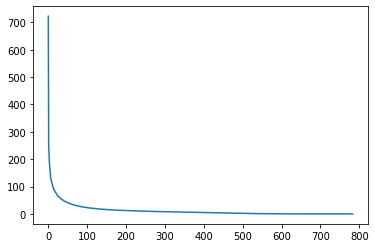

In [12]:
u1,s1,v1 = torch.svd(x_dataset1)
print("Training dataset")
plt.plot(s1)

Testing dataset


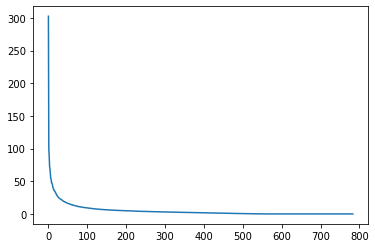

In [13]:
u2,s2,v2 = torch.svd(x_test_dataset1)
print("Testing dataset")
plt.plot(s2)

In [14]:
accuracyList=[]
# kList=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150]
# kList=[10,20,30,40,50,60,70,80,90,100,110,120,130,140]
# kList=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
# kList=[50,100,150,200,250,300,350,400,450,500,550,600,650,700]

for k in  range(10, 170, 10):
  print(k)
  u1,s1,v1 = torch.svd(x_dataset1)
  x_dataset=decomposed2tensor(u1,s1,v1,k)
  u2,s2,v2 = torch.svd(x_test_dataset1)
  x_test_dataset=decomposed2tensor(u2,s2,v2,k)
  weights=init_params((28*28,1))
  bias=init_params(1)
  params=weights,bias

  train_dset=list(zip(x_dataset,y_dataset))
  valid_dset=list(zip(x_test_dataset,y_test_dataset))
  dl=DataLoader(train_dset,batch_size=16)
  valid_dl=DataLoader(valid_dset,batch_size=32)
  
  accuracy=0.0

  for _ in range(100):
      train_epoch(logistic_regression_model,0.25,params)
      # print(validate_epoch(logistic_regression_model),end=' ')
      accuracy=validate_epoch(logistic_regression_model)
  accuracyList.append(accuracy)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


In [16]:
kList=list(range(10, 170, 10))

Text(0, 0.5, 'ACCURACY')

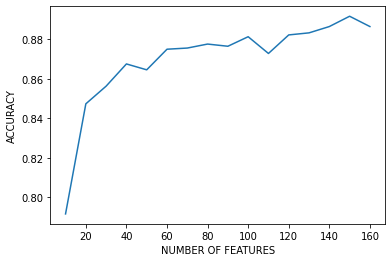

In [19]:
plt.plot(kList, accuracyList) 
plt.xlabel('NUMBER OF FEATURES') 
plt.ylabel('ACCURACY') 

The k with highest accuracy is approx 150